<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Подготовка-данных" data-toc-modified-id="Подготовка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Подготовка данных</a></span><ul class="toc-item"><li><span><a href="#Общая-информация-и-поиск-проблем" data-toc-modified-id="Общая-информация-и-поиск-проблем-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Общая информация и поиск проблем</a></span></li><li><span><a href="#Устранение-пропущенных-значений-и-лишних-столбцов" data-toc-modified-id="Устранение-пропущенных-значений-и-лишних-столбцов-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Устранение пропущенных значений и лишних столбцов</a></span></li></ul></li><li><span><a href="#Исследование-задачи" data-toc-modified-id="Исследование-задачи-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Исследование задачи</a></span><ul class="toc-item"><li><span><a href="#Исследуем-дисбаланс" data-toc-modified-id="Исследуем-дисбаланс-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Исследуем дисбаланс</a></span></li><li><span><a href="#OHE" data-toc-modified-id="OHE-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>OHE</a></span></li><li><span><a href="#Дерево-решений-с-дисбалансом" data-toc-modified-id="Дерево-решений-с-дисбалансом-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Дерево решений с дисбалансом</a></span></li><li><span><a href="#Логистическая-регрессия-с-дисбалансом" data-toc-modified-id="Логистическая-регрессия-с-дисбалансом-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>Логистическая регрессия с дисбалансом</a></span></li><li><span><a href="#Случайный-лес-с-дисбалансом" data-toc-modified-id="Случайный-лес-с-дисбалансом-2.5"><span class="toc-item-num">2.5&nbsp;&nbsp;</span>Случайный лес с дисбалансом</a></span></li><li><span><a href="#ROC-кривая" data-toc-modified-id="ROC-кривая-2.6"><span class="toc-item-num">2.6&nbsp;&nbsp;</span>ROC-кривая</a></span></li></ul></li><li><span><a href="#Борьба-с-дисбалансом" data-toc-modified-id="Борьба-с-дисбалансом-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Борьба с дисбалансом</a></span><ul class="toc-item"><li><span><a href="#Функция-upsample" data-toc-modified-id="Функция-upsample-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Функция <em>upsample</em></a></span></li><li><span><a href="#Функция-downsample" data-toc-modified-id="Функция-downsample-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Функция <em>downsample</em></a></span></li><li><span><a href="#Дерево-решений-с-балансом" data-toc-modified-id="Дерево-решений-с-балансом-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Дерево решений с балансом</a></span></li><li><span><a href="#Логистическая-регрессия-с-балансом" data-toc-modified-id="Логистическая-регрессия-с-балансом-3.4"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>Логистическая регрессия с балансом</a></span></li><li><span><a href="#Случайный-лес-с-балансом" data-toc-modified-id="Случайный-лес-с-балансом-3.5"><span class="toc-item-num">3.5&nbsp;&nbsp;</span>Случайный лес с балансом</a></span></li><li><span><a href="#ROC-кривая" data-toc-modified-id="ROC-кривая-3.6"><span class="toc-item-num">3.6&nbsp;&nbsp;</span>ROC-кривая</a></span></li></ul></li><li><span><a href="#Тестирование-модели" data-toc-modified-id="Тестирование-модели-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Тестирование модели</a></span></li><li><span><a href="#Вывод" data-toc-modified-id="Вывод-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Вывод</a></span></li></ul></div>

# Отток клиентов

Из «Бета-Банка» стали уходить клиенты. Каждый месяц. Немного, но заметно. Банковские маркетологи посчитали: сохранять текущих клиентов дешевле, чем привлекать новых.

Нужно спрогнозировать, уйдёт клиент из банка в ближайшее время или нет. Предоставлены исторические данные о поведении клиентов и расторжении договоров с банком. 

Источник данных: [https://www.kaggle.com/barelydedicated/bank-customer-churn-modeling](https://www.kaggle.com/barelydedicated/bank-customer-churn-modeling)

**Цель исследования**: построить модель с наибольшим значением *F1-меры*, не менее 0.59.

## Подготовка данных

In [34]:
import pandas as pd  
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score, roc_auc_score, roc_curve

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.dummy import DummyClassifier

import warnings
warnings.filterwarnings("ignore")

### Общая информация и поиск проблем

In [35]:
df = pd.read_csv('/datasets/Churn.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           9091 non-null   float64
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(3), int64(8), object(3)
memory usage: 1.1+ MB


In [36]:
df.head(10)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2.0,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1.0,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8.0,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1.0,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2.0,125510.82,1,1,1,79084.10,0
5,6,15574012,Chu,645,Spain,Male,44,8.0,113755.78,2,1,0,149756.71,1
6,7,15592531,Bartlett,822,France,Male,50,7.0,0.00,2,1,1,10062.80,0
7,8,15656148,Obinna,376,Germany,Female,29,4.0,115046.74,4,1,0,119346.88,1
8,9,15792365,He,501,France,Male,44,4.0,142051.07,2,0,1,74940.50,0
9,10,15592389,H?,684,France,Male,27,2.0,134603.88,1,1,1,71725.73,0


In [37]:
df.duplicated().sum()

0

In [38]:
df.isna().sum()

RowNumber            0
CustomerId           0
Surname              0
CreditScore          0
Geography            0
Gender               0
Age                  0
Tenure             909
Balance              0
NumOfProducts        0
HasCrCard            0
IsActiveMember       0
EstimatedSalary      0
Exited               0
dtype: int64

* Дубликаты отсутствуют.
* Пустые значения есть, в том сколько лет человек является клиентом банка. Их можно заполнить нулями и сразу привести к целым значениям. С остальными признаками на первый взгляд все в порядке. 
* Можно сразу удалить те столбцы, которые никак не будут вляить на результат - индекс строки в данных, уникальный идентификатор клиента, фамилия.

<AxesSubplot:xlabel='Age', ylabel='Count'>

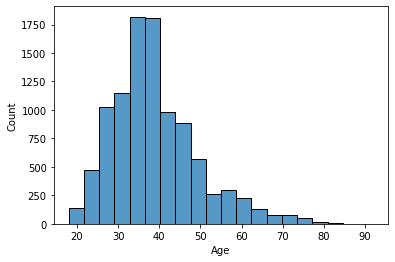

In [39]:
sns.histplot(df['Age'], bins = 20)

In [47]:
post, age = 10000, 12
for pred in range(9500, -1, -500):
    df['Age'][pred:post] = df['Age'][pred:post].replace(age, float('NaN'))
    post = pred
    age += 1

In [52]:
df.isna().sum()

RowNumber             0
CustomerId            0
Surname               0
CreditScore           0
Geography             0
Gender                0
Age                1058
Tenure                0
Balance               0
NumOfProducts         0
HasCrCard             0
IsActiveMember        0
EstimatedSalary       0
Exited                0
dtype: int64

In [49]:
df.head(10)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42.0,2.0,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41.0,1.0,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42.0,8.0,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39.0,1.0,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43.0,2.0,125510.82,1,1,1,79084.10,0
5,6,15574012,Chu,645,Spain,Male,44.0,8.0,113755.78,2,1,0,149756.71,1
6,7,15592531,Bartlett,822,France,Male,50.0,7.0,0.00,2,1,1,10062.80,0
7,8,15656148,Obinna,376,Germany,Female,29.0,4.0,115046.74,4,1,0,119346.88,1
8,9,15792365,He,501,France,Male,44.0,4.0,142051.07,2,0,1,74940.50,0
9,10,15592389,H?,684,France,Male,NaN,2.0,134603.88,1,1,1,71725.73,0


In [54]:
df.head(10)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,0,42.0,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,0,41.0,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,0,42.0,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,0,39.0,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,0,43.0,2,125510.82,1,1,1,79084.10,0
5,6,15574012,Chu,645,Spain,1,44.0,8,113755.78,2,1,0,149756.71,1
6,7,15592531,Bartlett,822,France,1,50.0,7,0.00,2,1,1,10062.80,0
7,8,15656148,Obinna,376,Germany,0,29.0,4,115046.74,4,1,0,119346.88,1
8,9,15792365,He,501,France,1,44.0,4,142051.07,2,0,1,74940.50,0
9,10,15592389,H?,684,France,1,NaN,2,134603.88,1,1,1,71725.73,0


### Устранение пропущенных значений и лишних столбцов

In [55]:
df=df.drop(['RowNumber','CustomerId','Surname'],axis=1)

In [50]:
df['Tenure']=df['Tenure'].fillna(df['Tenure'].median()).astype('int64')

In [51]:
df.info() #проверка 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              8942 non-null   float64
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(3), int64(8), object(3)
memory usage: 1.1+ MB


## Исследование задачи

### Исследуем дисбаланс

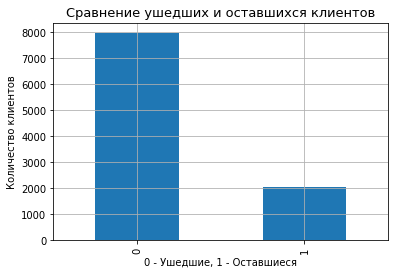

In [44]:
df['Exited'].value_counts().plot(kind='bar',grid=True)

plt.xlabel('0 - Ушедшие, 1 - Оставшиеся', size=10)
plt.ylabel('Количество клиентов', size=10)
plt.title('Сравнение ушедших и оставшихся клиентов', size=13)

plt.show()

Из графика видно, что присутствует явный дисбаланс. Клиентов ушедших в 4 раза больше, чем оставшихся. Решение проблемы продолжим в пункте 3.

### OHE

In [45]:
df_ohe=pd.get_dummies(df,drop_first=True)

df_train, df_test = train_test_split(df_ohe, test_size=0.4, random_state=12345) 

features_train = df_train.drop(['Exited'], axis=1)
target_train = df_train['Exited']

features = df_test.drop('Exited', axis=1)
target = df_test['Exited']
features_valid, features_test, target_valid, target_test = train_test_split(features, target, test_size=0.5, random_state=12345)

Первым действием избавляемся от дамми-ловушки.

**Получиаем следущие соотношения:**
* features_train, target_train - обучающая выборка (60%)
* features_valid, target_valid - валидационная выборка (20%)
* features_test, target_test - тестовая выборка (20%)

In [46]:
print(f'Размерность признаков - {features_train.shape} и целевого признака - {target_train.shape} обучающей выборки')
print(f'Размерность признаков - {features_valid.shape} и целевого признака - {target_valid.shape} валидационной выборки')
print(f'Размерность признаков - {features_test.shape} и целевого признака - {target_test.shape} тестовой выборки')

Размерность признаков - (6000, 11) и целевого признака - (6000,) обучающей выборки
Размерность признаков - (2000, 11) и целевого признака - (2000,) валидационной выборки
Размерность признаков - (2000, 11) и целевого признака - (2000,) тестовой выборки


In [47]:
numeric=['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember']
scaler=StandardScaler()
scaler.fit(features_train[numeric])

features_train[numeric]=scaler.transform(features_train[numeric])
features_valid[numeric]=scaler.transform(features_valid[numeric])
features_test[numeric]=scaler.transform(features_test[numeric])

Отмасштабировали признаки всех выборок.

* Обнаружен дисбаланс в целевом признаке. Значение положительных ответов в 4 раза меньше, чем отрицательных.
* Разделелили данные на тренировочную, валидационную и тестовую выборки в отношении 3:1:1 соответственно.
* Избавились от категориальных признаков и возможной дамми-ловушки.
* Стандартизировали все выборки.

### Дерево решений с дисбалансом

In [48]:
best_result, best_depth = 0, 0
for depth in range(1, 15):
    model = DecisionTreeClassifier(max_depth=depth, random_state=12345)
    model.fit(features_train, target_train)
    prediction=model.predict(features_valid)
    result = f1_score(target_valid, prediction)
    if result > best_result:
        best_result = result
        best_depth = depth
print(f'Глубина дерева: {best_depth}')
print(f'F1: {best_result}')

probabilities_valid = model.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]
fpr_tree, tpr_tree, thresholds = roc_curve(target_valid, probabilities_one_valid)
auc_roc = roc_auc_score(target_valid ,probabilities_one_valid)

print(f'AUC_ROC: {auc_roc}')

Глубина дерева: 6
F1: 0.5696969696969697
AUC_ROC: 0.6880062182810205


Глубина дерева, при котором достигается максимальная F1 равна 9.

### Логистическая регрессия с дисбалансом

In [49]:
model = LogisticRegression(solver = 'liblinear')
model.fit(features_train, target_train)
prediction = model.predict(features_valid)
print(f'F1: {f1_score(target_valid, prediction)}')

probabilities_valid = model.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]
fpr_log, tpr_log, thresholds = roc_curve(target_valid, probabilities_one_valid)
auc_roc = roc_auc_score(target_valid ,probabilities_one_valid)

print(f'AUC_ROC: {auc_roc}')

F1: 0.0
AUC_ROC: 0.5095965980921733


Удивительная ситуация, но F1-мера в логистической регрессии равно 0. Возможно, это связано с большим дисбалансом.

### Случайный лес с дисбалансом

In [50]:
best_result, best_est, best_depth = 0, 0, 0
for est in range(10, 51, 5):
    for depth in range (1, 15):
        model = RandomForestClassifier(random_state=12345, n_estimators=est, max_depth=depth)
        model.fit(features_train, target_train)
        prediction = model.predict(features_valid)
        result = f1_score(target_valid, prediction)
        if result > best_result:
            best_result = result
            best_est = est
            best_depth = depth
print(f'Глубина дерева: {best_depth}')
print(f'F1: {best_result}')
print(f'Количество деревьев: {best_est}')

probabilities_valid = model.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]
fpr_for, tpr_for, thresholds = roc_curve(target_valid, probabilities_one_valid)
auc_roc = roc_auc_score(target_valid ,probabilities_one_valid)

print(f'AUC_ROC: {auc_roc}')

Глубина дерева: 14
F1: 0.5941176470588235
Количество деревьев: 15
AUC_ROC: 0.836652169442109


Лучшее значение F1 ~ 0.595 ожидаемо у случайного леса. Эта мера достигатетя при глубине = 12 и количестве деревьев = 15. 

### ROC-кривая

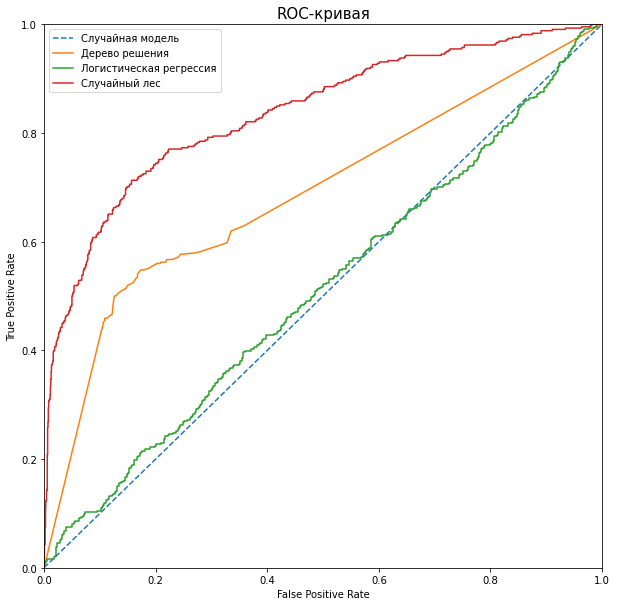

In [51]:
plt.figure(figsize=(10,10))

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])

plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr_tree, tpr_tree)
plt.plot(fpr_log, tpr_log)
plt.plot(fpr_for, tpr_for)

plt.xlabel('False Positive Rate', size=10)
plt.ylabel('True Positive Rate', size=10)
plt.title('ROC-кривая', size=15)
plt.legend(('Случайная модель','Дерево решения','Логистическая регрессия','Случайный лес'))
plt.show()

## Борьба с дисбалансом

### Функция *upsample*

In [52]:
def upsample(features, target, repeat):
    features_zeros = features[target == 0]
    features_ones = features[target == 1]
    target_zeros = target[target == 0]
    target_ones = target[target == 1]

    features_upsampled = pd.concat([features_zeros] + [features_ones] * repeat)
    target_upsampled = pd.concat([target_zeros] + [target_ones] * repeat)
    
    features_upsampled, target_upsampled = shuffle(features_upsampled, target_upsampled, random_state=12345)
    
    return features_upsampled, target_upsampled

features_upsampled, target_upsampled = upsample(features_train, target_train, 4)

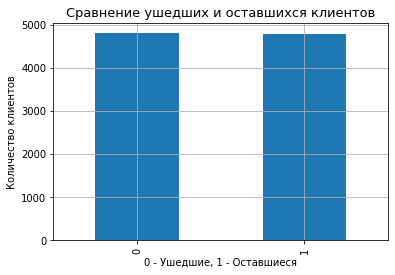

(9588,)

In [53]:
target_upsampled.value_counts().plot(kind='bar',grid=True)

plt.xlabel('0 - Ушедшие, 1 - Оставшиеся', size=10)
plt.ylabel('Количество клиентов', size=10)
plt.title('Сравнение ушедших и оставшихся клиентов', size=13)

plt.show()
target_upsampled.shape

Функция *upsample* увеличило количество положительных ответов = 4 раза, таким образом установился баланс.

### Функция *downsample*

In [54]:
def downsample(features, target, fraction):
    features_zeros = features[target == 0]
    features_ones = features[target == 1]
    target_zeros = target[target == 0]
    target_ones = target[target == 1]

    features_downsampled = pd.concat([features_zeros.sample(frac=fraction, random_state=12345)] + [features_ones])
    target_downsampled = pd.concat([target_zeros.sample(frac=fraction, random_state=12345)] + [target_ones])
    
    features_downsampled, target_downsampled = shuffle(features_downsampled, target_downsampled, random_state=12345)
    
    return features_downsampled, target_downsampled

features_downsampled, target_downsampled = downsample(features_train, target_train, 0.25)

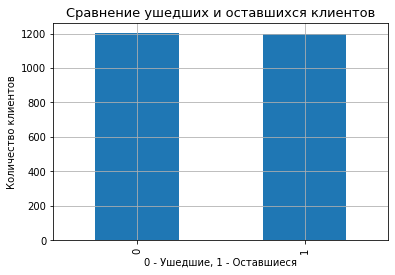

(2397,)

In [55]:
target_downsampled.value_counts().plot(kind='bar',grid=True)

plt.xlabel('0 - Ушедшие, 1 - Оставшиеся', size=10)
plt.ylabel('Количество клиентов', size=10)
plt.title('Сравнение ушедших и оставшихся клиентов', size=13)

plt.show()
target_downsampled.shape

Функция *downsample* уменьшила количество ответов = 0 в 4 раза, таким образом установился баланс.

### Дерево решений с балансом

In [56]:
best_result, best_depth = 0, 0
for depth in range(1, 15):
    model = DecisionTreeClassifier(max_depth=depth, random_state=12345)
    model.fit(features_upsampled, target_upsampled)
    prediction=model.predict(features_valid)
    result = f1_score(target_valid, prediction)
    if result > best_result:
        best_result = result
        best_depth = depth
print(f'Глубина дерева: {best_depth}')
print(f'F1: {best_result}')

probabilities_valid = model.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]
fpr_tree, tpr_tree, thresholds = roc_curve(target_valid, probabilities_one_valid)
auc_roc = roc_auc_score(target_valid ,probabilities_one_valid)

print(f'AUC_ROC: {auc_roc}')

Глубина дерева: 5
F1: 0.5963791267305644
AUC_ROC: 0.7002197267101785


Значение F1 выросло, теперь оно превышает 0.59.

### Логистическая регрессия с балансом

In [57]:
model = LogisticRegression(solver = 'liblinear')
model.fit(features_upsampled, target_upsampled)
prediction = model.predict(features_valid)
print(f'F1: {f1_score(target_valid, prediction)}')

probabilities_valid = model.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]
fpr_log, tpr_log, thresholds = roc_curve(target_valid, probabilities_one_valid)
auc_roc = roc_auc_score(target_valid ,probabilities_one_valid)

print(f'AUC_ROC: {auc_roc}')

F1: 0.49146757679180886
AUC_ROC: 0.7635782940859793


F1 хотя бы не равняется нулю.

### Случайный лес с балансом

In [58]:
best_result, best_est, best_depth = 0, 0, 0
for est in range(10, 51, 5):
    for depth in range (1, 15):
        model = RandomForestClassifier(random_state=12345, n_estimators=est, max_depth=depth)
        model.fit(features_upsampled, target_upsampled)
        prediction = model.predict(features_valid)
        result = f1_score(target_valid, prediction)
        if result > best_result:
            best_result = result
            best_est = est
            best_depth = depth
print(f'Глубина дерева: {best_depth}')
print(f'F1: {best_result}')
print(f'Количество деревьев: {best_est}')

probabilities_valid = model.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]
fpr_for, tpr_for, thresholds = roc_curve(target_valid, probabilities_one_valid)
auc_roc = roc_auc_score(target_valid ,probabilities_one_valid)

print(f'AUC_ROC: {auc_roc}')

Глубина дерева: 14
F1: 0.6274509803921569
Количество деревьев: 20
AUC_ROC: 0.843867764745734


F1-мера как всегда лучше у случайного леса. Его и будем использовать при тестировании в последнем пункте с параметрами *max_depth=13* и  *n_estimators = 35*.

### ROC-кривая

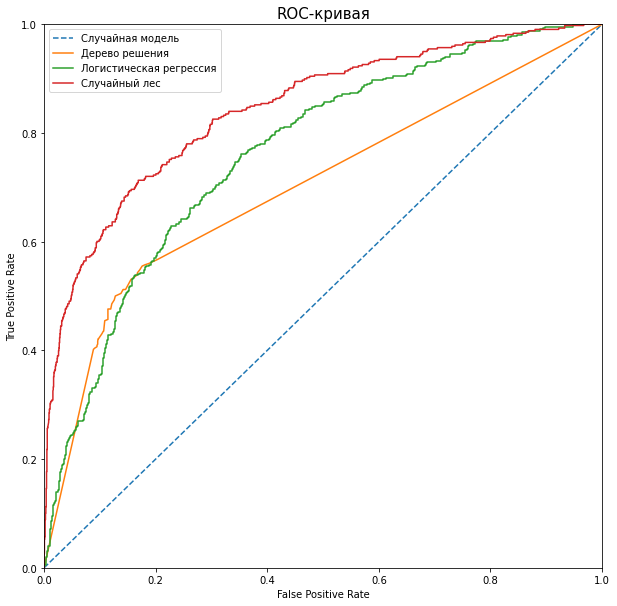

In [59]:
plt.figure(figsize=(10,10))

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])

plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr_tree, tpr_tree)
plt.plot(fpr_log, tpr_log)
plt.plot(fpr_for, tpr_for)

plt.xlabel('False Positive Rate', size=10)
plt.ylabel('True Positive Rate', size=10)
plt.title('ROC-кривая', size=15)
plt.legend(('Случайная модель','Дерево решения','Логистическая регрессия','Случайный лес'))
plt.show()

## Тестирование модели

In [63]:
model_best = RandomForestClassifier(class_weight = 'balanced', max_depth=13,  n_estimators = 35, random_state=12345)
model_best.fit(features_upsampled, target_upsampled)
best_prediction = model_best.predict(features_test)
print(f'F1: {f1_score(target_test, best_prediction)}')
print(f'Точность: {precision_score(target_test, best_prediction)}')
print(f'Полнота: {recall_score(target_test, best_prediction)}')

probabilities_test = model_best.predict_proba(features_test)
probabilities_one_test = probabilities_test[:, 1]
fpr_best, tpr_best, thresholds = roc_curve(target_test, probabilities_one_test)
auc_roc = roc_auc_score(target_test ,probabilities_one_test)
print(f'AUC_ROC: {auc_roc}')

F1: 0.5932203389830507
Точность: 0.607940446650124
Полнота: 0.5791962174940898
AUC_ROC: 0.8440383407463373


Мы взяли случайный лес с параметрами *max_depth=13* и  *n_estimators = 35*, которые получили из предыдущего пункта. F1 > 0.6, что не может не радовать.

In [61]:
dummy_model = DummyClassifier(strategy='constant', constant=1)
dummy_model.fit(features_train, target_train)
print('F1-мера константой модели:', f1_score(dummy_model.predict(features_test), target_test))
print('F1-мера лучшей модели:', f1_score(target_test, best_prediction))

F1-мера константой модели: 0.3491539413949649
F1-мера лучшей модели: 0.5932203389830507


Проверка на адекватность прошла успешно. F1-мера лучшей модели явно превышает F1-меру модели с константными значениями.

## Вывод

В ходе исследования был обнаружен дисбаланс класса. В целевом признаке отрицательных ответов было в 4 раза больше, чем положительных. В результате чего была показана низкая F1-мера при первоначальных испытанииях моделей. 

Затем после устранения дисбаланса с помощью функции upsample, которая увеличила число положительных ответов в тренировочной выборке в 4 раза, были показаны адекватные F1-меры.

Таким образом, было проведено исследование на трех моделях:

1. Дерево решений;
2. Логистическая регрессия;
3. Случайный лес.

Лучшая F1-мера была показана у случайного леса ~0.6 с гиперпараметрами n_estimators=35, max_depth=13. Модель прошла проверку на адекватность.
* F1: 0.6056166056166056
* Точность: 0.6262626262626263
* Полнота: 0.5862884160756501
* AUC_ROC: 0.849258174916913